In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors
from math import exp

import package_LAB
from package_LAB import LeadLag_RT, PID_RT
import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

from importlib import reload
package_LAB = reload(package_LAB)

## Scenario

In [48]:

SPPath = {0:0, 5:50, 60:70, 100:50, TSim:50}
MVManPath = {0:0, 200:70, 220:50, TSim:0}
ManPath = {0:0, 200:1, 220:0, TSim:0}
DVPath = {0:50, 140:100, 175:50, TSim:50}
ManFF = False

(0.0, 250.0)

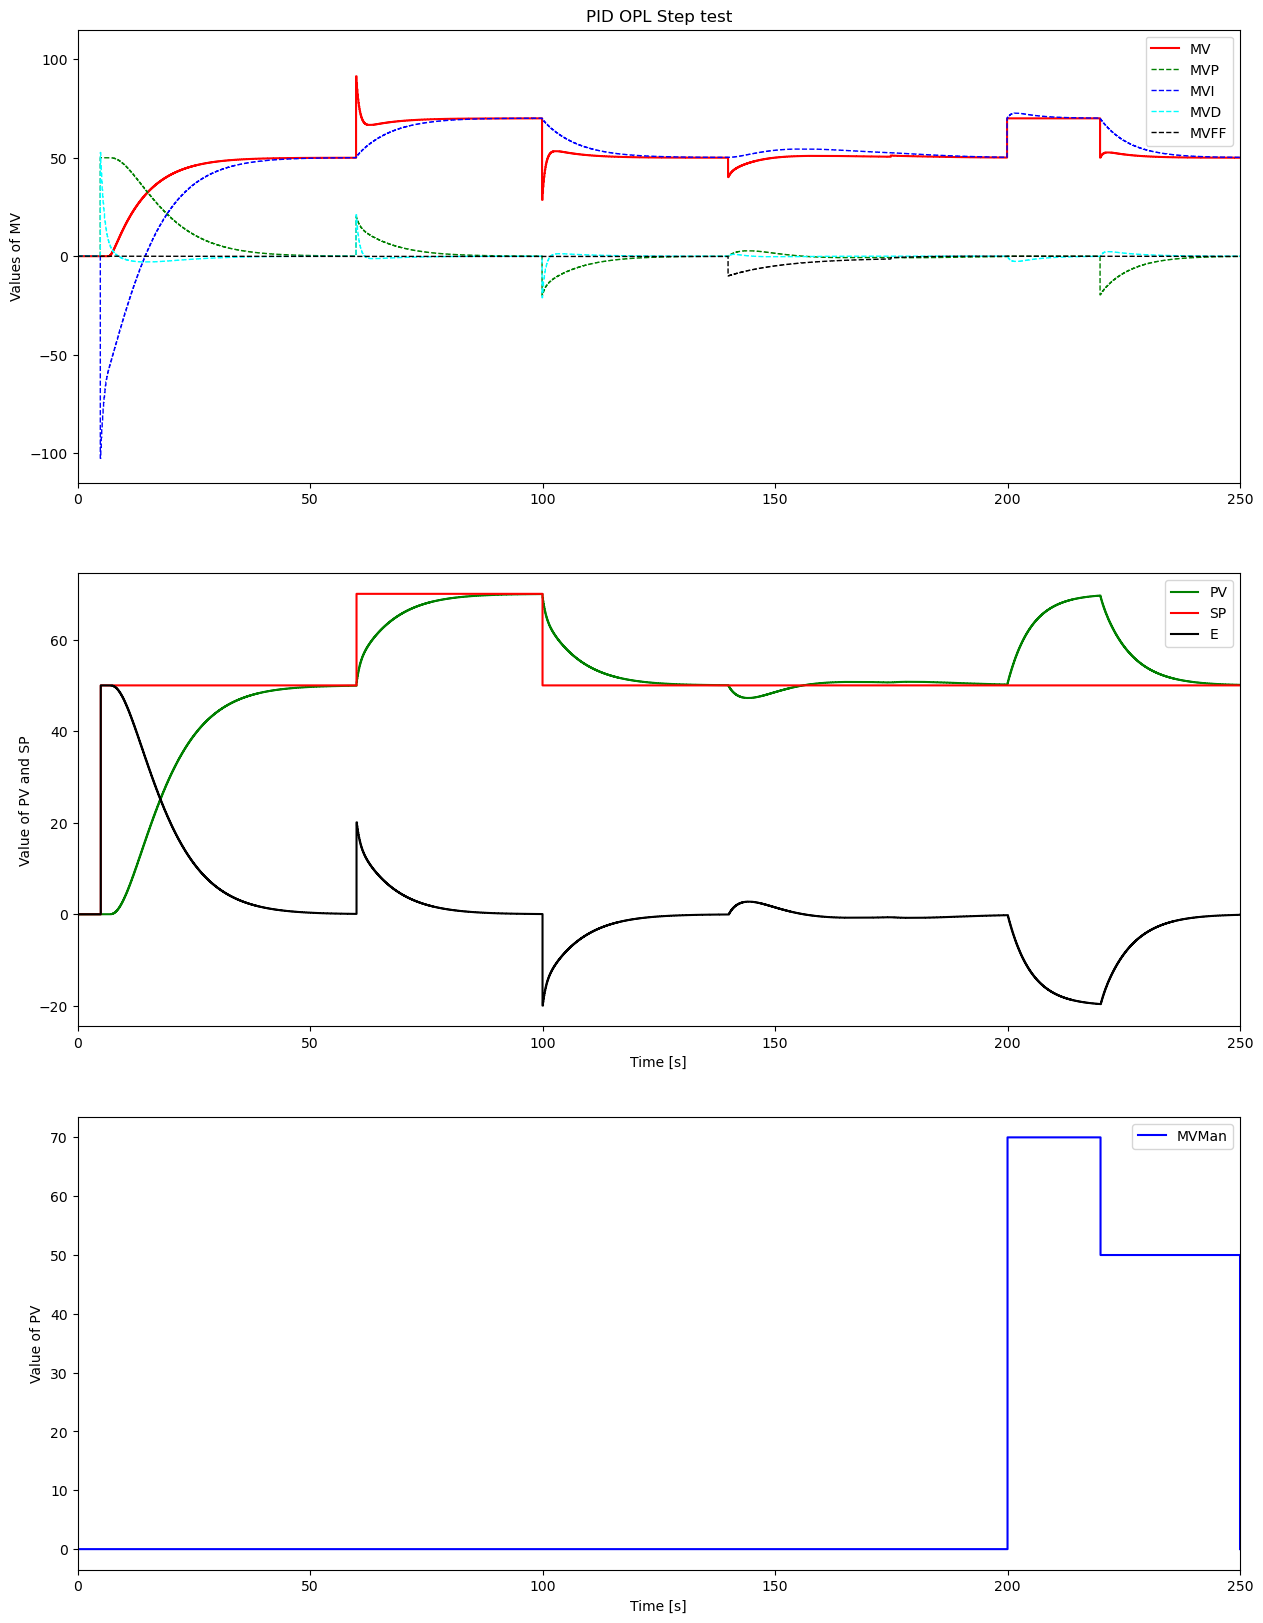

In [53]:
TSim = 250
Ts = 0.1
N = int(TSim/Ts) + 1

t = []
MV = [0]
SP = []
PV = []
DV = []
Man = []
MVMan = []
MVFF = []
MVP = []
MVI = []
MVD = []


# Parameters
Kp = 1
KpExp = 0.4971
KdExp = 0.3734
Kff = KdExp/KpExp #0.7512
Kc = 1
Td = 1
Ti = 6
alpha = 0.9
theta_pExp = 4.386
theta_dExp = 12.181
theta_ffExp = max(0, theta_dExp-theta_pExp)
dff = round(theta_ffExp/Ts)

MVMin = 0
MVMax = 100
E = []
ManFF=False
PVInit=0
method='EBD-EBD'
TFO = 5

T1DV = 153.9969
T2DV = 42.4662

T1PV = 201.8353
T2PV = 14.1389

MVFFdv = []
MVFFpv = []


for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPPath,t,SP)
    SelectPath_RT(MVManPath,t,MVMan)
    SelectPath_RT(ManPath,t,Man)
    SelectPath_RT(DVPath,t,DV)

    """
    #Input-output dynamix P(s)
    Delay_RT(MV, thetap, Ts, MVDelayp, MVO)
    FO_RT(MVDelayp,Kp,T1p,Ts,PV1p,0)
    FO_RT(PV1p,1,T2p,Ts,PV2p,0)

    #Input-output dynamix D(s)
    Delay_RT(DV - DV0*np.ones_like(DV),thetad,Ts,MVDelayd,0)
    FO_RT(MVDelayp,Kd,T1d,Ts,PV1d,0)
    FO_RT(PV1d,1,T2d,Ts,PV2d,0)

    PV.append(PV2p[-1] + PV2d[-1] + PV0-Kp*MVo
    """

    LeadLag_RT(DV, KdExp, T1DV, T2DV, Ts, MVFFdv)
    LeadLag_RT(DV, KpExp, T1PV, T2PV, Ts, MVFFpv)
              
    MVFF.append(-Kff*MVFFdv[-1]*MVFFpv[-1]*exp(-theta_ffExp))

    
    PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF)
    
    FO_RT(MV,Kp,TFO,Ts,PV)




plt.figure(figsize = (15,20))

plt.subplot(3,1,1)
plt.step(t,MV,'r-',label='MV',where='pre')
plt.step(t,MVP,'green',label='MVP',where='pre', ls = '--', linewidth = '1' )
plt.step(t,MVI,'blue',label='MVI',where='pre', ls = '--', linewidth = '1')
plt.step(t,MVD,'cyan',label='MVD',where='pre', ls = '--', linewidth = '1')
plt.step(t,MVFF,'black',label='MVFF',where='pre', ls = '--', linewidth = '1')
#plt.plot(MVI, ls = ':')
plt.ylabel('Values of MV')
plt.title('PID OPL Step test')
plt.legend(loc="upper right", bbox_to_anchor=(1,1))
plt.xlim([0, TSim])
plt.ylim([-115,115])

plt.subplot(3,1,2)
plt.step(t,PV,'-g', label='PV',where='post')
plt.step(t,SP,'-r', label='SP',where='post')
plt.step(t,E,'black', label='E',where='post')
plt.ylabel('Value of PV and SP')
plt.xlabel('Time [s]')
plt.legend(loc="upper right", bbox_to_anchor=(1,1))
plt.xlim([0, TSim])    

plt.subplot(3,1,3)
plt.step(t,MVMan,'-b', label='MVMan',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim]) 